In [ ]:
arcpy.Exists("states")

In [ ]:
desc1 = arcpy.Describe("states")

In [ ]:
desc2 = arcpy.da.Describe("states")
print(dir(desc2))

## Get fields

In [ ]:
fields = [field.name for field in desc2['fields']]
print(fields)

## Do some query on the dataset

In [ ]:
search_cursor = arcpy.da.SearchCursor("states",["STATE_NAME","POP_SQMI"], where_clause = "*")
search_cursor = arcpy.da.SearchCursor("states",["STATE_NAME","POP_SQMI"], where_clause = "POP_SQMI > 20")
search_cursor = arcpy.da.SearchCursor("states",["STATE_NAME","POP_SQMI"], where_clause = "STATE_NAME LIKE 'A%'")

In [ ]:
for row in search_cursor:
    print(row)

## Use geometry tokens

### List of geomtry tokens from arcgis
SHAPE@ – Full geometry object.
SHAPE@XY – Centroid coordinates as a tuple (X, Y).
SHAPE@TRUECENTROID – True centroid coordinates as a tuple (X, Y).
SHAPE@X – X coordinate of the centroid.
SHAPE@Y – Y coordinate of the centroid.
SHAPE@Z – Z coordinate (elevation).
SHAPE@M – M value (measure).
SHAPE@LENGTH – Length of the geometry (for lines/polygons).
SHAPE@AREA – Area of the geometry (for polygons).
SHAPE@WKT – Well-Known Text (WKT) representation of the geometry.
SHAPE@WKB – Well-Known Binary (WKB) representation of the geometry.
SHAPE@JSON – Geometry as a JSON string.

In [ ]:
search_cursor = arcpy.da.SearchCursor("states",["OID@","SHAPE@","STATE_NAME","POP2010"], where_clause = "*")
for row in search_cursor:
    print(row)

In [ ]:
search_cursor = arcpy.da.SearchCursor("states",["OID@","SHAPE@AREA","STATE_NAME","POP2010"], where_clause = "*")
for row in search_cursor:
    print(f"{row[2]} has a population density of {row[3] / row[1]}")

In [ ]:
#dir(search_cursor)
#search_cursor.reset()
search_cursor.next()

## Geometries

In [ ]:
search_cursor = arcpy.da.SearchCursor("states",["OID@","SHAPE@","STATE_NAME","POP2010"], where_clause = "*")
geom = search_cursor.next()[1]

In [ ]:
#print(dir(geom))
#print(type(geom))
#geom.spatialReference.name
geom.JSON
#help(geom.getArea)
geom.getArea('GEODESIC',"SQUAREMILES")

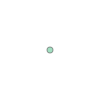

In [2]:
import arcpy
point = arcpy.Point(4.900160, 52.378424)
pointgeo = arcpy.PointGeometry(point, 4326)
pointgeo

141.4213562373095


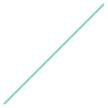

In [3]:
point1 = arcpy.Point(0, 0)
point2 = arcpy.Point(100, 100)
array = arcpy.Array([point1, point2])
polyline = arcpy.Polyline(array)
print(polyline.length)
polyline

2500.0


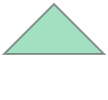

In [4]:
import arcpy
point1 = arcpy.Point(0,0)
point2 = arcpy.Point(100, 0)
point3 = arcpy.Point(50, 50)
array = arcpy.Array([point1, point2, point3, point1])
polygon = arcpy.Polygon(array)
print(polygon.area)
polygon

In [ ]:
# Create an empty array to store the rings
polygon_array = arcpy.Array()

# Define the exterior ring (outer boundary) as a list of points
outer_ring = arcpy.Array([arcpy.Point(0, 0), arcpy.Point(10, 0), arcpy.Point(10, 10),
                          arcpy.Point(0, 10), arcpy.Point(0, 0)])

# Define the interior ring (hole) as a list of points
inner_ring = arcpy.Array([arcpy.Point(3, 3), arcpy.Point(7, 3), arcpy.Point(7, 7),
                          arcpy.Point(3, 7), arcpy.Point(3, 3)])

# Add the rings to the array: first the outer ring, then the inner ring
polygon_array.add(outer_ring)  # Add exterior ring first
polygon_array.add(inner_ring)  # Add interior ring

# Create a polygon from the array of rings
polygon_with_hole = arcpy.Polygon(polygon_array)
polygon_with_hole



RuntimeError: DescribeGeometry: Error in getting part from geometry

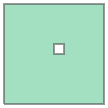

In [15]:
#create a multipart polygon
import arcpy
point1 = arcpy.Point(0,0)
point2 = arcpy.Point(100, 0)
point3 = arcpy.Point(100, 100)
point4 = arcpy.Point(0, 100)
array1 = arcpy.Array([point1, point2, point3, point4, point1])
point5 = arcpy.Point(50, 50)
point6 = arcpy.Point(60, 50)
point7 = arcpy.Point(60, 60)
point8 = arcpy.Point(50, 60)
array2 = arcpy.Array([point5, point6, point7, point8, point5])
multipart_polygon = arcpy.Polygon(arcpy.Array([array1, array2]))
multipart_polygon


In [6]:
for part in polygon_with_hole:
    for pnt in part:
        print(pnt)

0 0 NaN NaN
0 10 NaN NaN
10 10 NaN NaN
10 0 NaN NaN
0 0 NaN NaN
None
3 3 NaN NaN
7 3 NaN NaN
7 7 NaN NaN
3 7 NaN NaN
3 3 NaN NaN


### Some geometry calculations

- Buffer
- Intersect
- Union
- Difference
- Convex Hull 
- Spatial relationships: contain, within, overlaps, touches, crosses
- Boundary, centroid, extent
- Project: projectAs

In [ ]:
coordlist = [[523017.4, 4260650.0],
             [523125.8, 4260732.6],
             [523084.1, 4260787.2]]
pointlist = []
sr = arcpy.SpatialReference("NAD 1983 UTM Zone 10N")
for x, y in coordlist:
    point = arcpy.Point(x,y)
    pointgeometry = arcpy.PointGeometry(point, sr)
    pointlist.append(pointgeometry)
    
pointlist

In [ ]:
buffer1 = pointlist[0].buffer(100)
buffer2 = pointlist[1].buffer(100)
#buffer3 = buffer2.intersect(buffer1,4)
buffer3 = buffer2.difference(buffer1)


In [ ]:
buffer4 = buffer3.projectAs(arcpy.SpatialReference(4326))
buffer4.spatialReference.name

In [ ]:
import arcpy
import csv

# Prompt for user input
csv_file_path = r"C:\Users\leiwang\Documents\geog4057\Homeworks\points.csv"
geodatabase_path = r"C:\Users\leiwang\Documents\ArcGIS\Projects\GEOG4057\GEOG4057.gdb"
feature_class_name = "points"

# Determine the number of fields and field names from the CSV header
with open(csv_file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    header = next(csv_reader)
    num_fields = len(header)

# Create a new point feature class
sr = arcpy.SpatialReference(4326)  
arcpy.CreateFeatureclass_management(geodatabase_path, feature_class_name, "POINT", spatial_reference=sr)

# Add fields to the feature class based on the CSV header
field_info = arcpy.ListFields(geodatabase_path + "/" + feature_class_name)
field_names = [field.name for field in field_info]
for field in header:
    if field not in field_names:
        arcpy.AddField_management(geodatabase_path + "/" + feature_class_name, field, "DOUBLE")

# Create a cursor for inserting point features with additional fields
cursor_fields = ["SHAPE@X", "SHAPE@Y"] + header
with arcpy.da.InsertCursor(geodatabase_path + "/" + feature_class_name, cursor_fields) as cursor:
    # Read data from the CSV file and create point features with attributes
    with open(csv_file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        
        # Skip the header row (if present)
        next(csv_reader, None)
        
        for row in csv_reader:
            x = float(row[0])
            y = float(row[1])
            additional_fields = row
            cursor.insertRow((x, y) + tuple(additional_fields))

print(f"New point feature class '{feature_class_name}' created in '{geodatabase_path}' with {num_fields} fields.")


In [ ]:
import arcpy
import csv
import os

# Prompt for user input
csv_file_path = "Enter the path to the CSV file: "
geodatabase_path = "Enter the path to the geodatabase: "
feature_class_name = "points"

# Determine the number of fields and field names from the CSV header
with open(csv_file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    header = next(csv_reader)
    num_fields = len(header)

# Create SpatialReference objects: one for NAD83 and one for Albers Equal Area Contiguous USA USGS 
sr_gcs = arcpy.SpatialReference(4269) # for NAD83   
sr_albsers = arcpy.SpatialReference(102039)
# Create a new point feature class
arcpy.CreateFeatureclass_management(geodatabase_path, feature_class_name, "POINT_albers", spatial_reference=sr_albsers)
fcName = os.path.join(geodatabase_path,feature_class_name)
# Add fields to the feature class based on the CSV header

# first, read the exisint fields 
describe = arcpy.da.Describe(fcName)
field_names = [field.name for field in describe["fields"]]


for field in header:
    if field not in field_names:
        arcpy.AddField_management(fcName, field, "TEXT")

# Create a cursor for inserting point features with additional fields
cursor_fields = ["SHAPE@"] + header
with arcpy.da.InsertCursor(fcName, cursor_fields) as cursor:
    # Read data from the CSV file and create point features with attributes
    with open(csv_file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        
        # Skip the header row (if present)
        next(csv_reader, None)
        
        for table_value in csv_reader:
            x = float(table_value[0]) # note that the first two fields in the csv must be longitude and latitude
            y = float(table_value[1])
            pnt = arcpy.PointGeometry((x,y),sr_gcs)
            pnt_alberse = pnt.projectAs(sr_albsers)

            cursor.insertRow(pnt_alberse + table_value)

print(f"New point feature class '{feature_class_name}' created in '{geodatabase_path}' with {num_fields} fields.")